In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


2023-08-10 22:23:06.918302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 22:23:07.152744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 22:23:07.157026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 22:23:08.956062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
mnist = tf.keras.datasets.mnist     #loading Data set
(x_train , y_train) , (x_test , y_test) = mnist.load_data()



In [4]:
#Normalizing
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28 , 28)))
model.add(tf.keras.layers.Dense(128 , activation= 'relu'))
model.add(tf.keras.layers.Dense(128 , activation= 'relu'))
model.add(tf.keras.layers.Dense(10 , activation= 'softmax'))


In [6]:
model.compile(optimizer= 'adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [7]:
model.fit(x_train , y_train , epochs=3) 
model.save('handwritten.model')

Epoch 1/3


2023-08-10 22:23:25.302992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2681 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0735 - accuracy: 0.9772
INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [8]:
model = tf.keras.models.load_model('handwritten.model')


In [9]:
loss , accuracy = model.evaluate(x_test , y_test)
print(loss)
print(accuracy *100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9743
0.08676935732364655
97.43000268936157


1/1 [==============================] - 0s 64ms/step
This digit is Prolly a 1


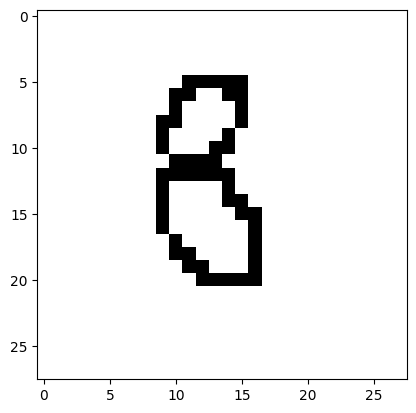

1/1 [==============================] - 0s 24ms/step
This digit is Prolly a 3


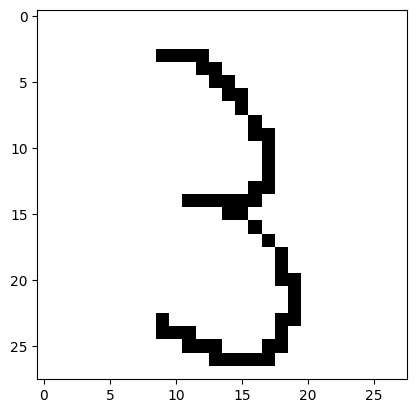

1/1 [==============================] - 0s 25ms/step
This digit is Prolly a 2


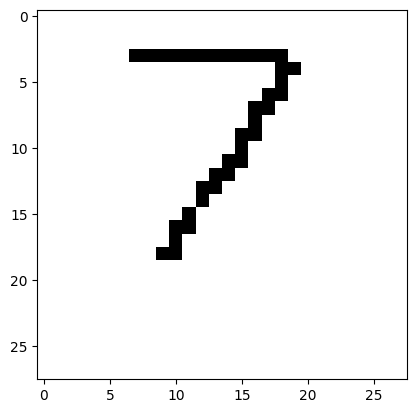

1/1 [==============================] - 0s 21ms/step
This digit is Prolly a 2


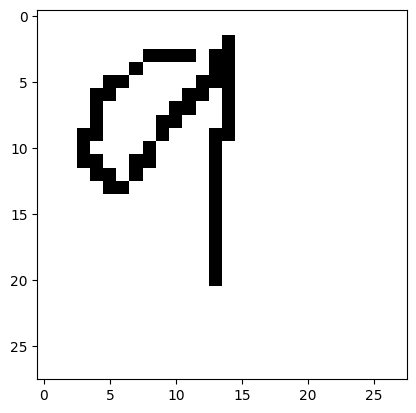

1/1 [==============================] - 0s 22ms/step
This digit is Prolly a 5


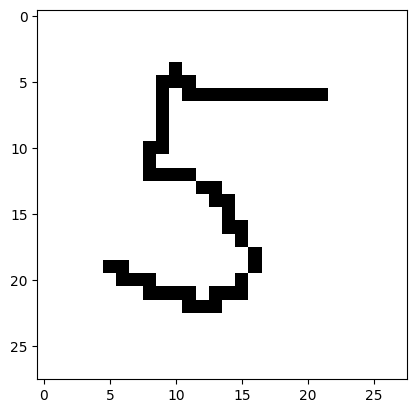

1/1 [==============================] - 0s 22ms/step
This digit is Prolly a 2


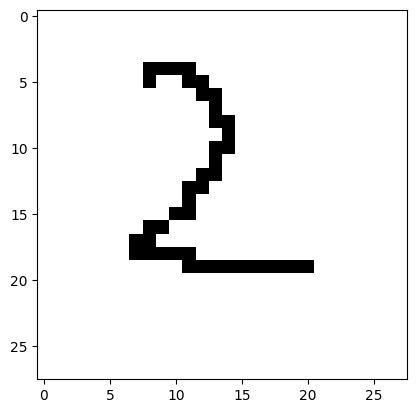

In [10]:
model = tf.keras.models.load_model('handwritten.model')

image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is Prolly a {np.argmax(prediction)}")
        plt.imshow(img[0] , cmap = plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1
